### Import Tools for Analyst

In [434]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [435]:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"#89CFF3"})
sns.set_palette("mako")

### Accessing the Data

In [436]:
df = pd.read_csv('Car_Sales.csv')
df

,Car Brand,Production Year,Fuel Type,Price (thousand $),Sales (Units),Weight (kg),Power (HP),Length (cm),Width (cm),Height (cm)
0,Toyota,2019,Petrol,25000,500,1500,150,430,170,145
1,Honda,2020,Electric,30000,600,1400,120,420,165,150
2,Ford,2018,Diesel,28000,550,1600,180,450,175,155
3,Nissan,2021,Petrol,27000,700,1550,160,440,172,148
4,Chevrolet,2017,Diesel,22000,450,1700,200,460,180,160
5,Toyota,2022,Electric,32000,750,1450,140,435,168,147
6,Honda,2019,Petrol,26000,520,1520,135,425,167,149
7,Ford,2020,Diesel,29000,610,1620,190,455,178,157
8,Nissan,2018,Petrol,25500,480,1570,155,438,169,152
9,Chevrolet,2021,Diesel,31000,700,1650,175,445,173,158


### Data Cleaning

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Car Brand           60 non-null     object
 1   Production Year     60 non-null     int64 
 2   Fuel Type           60 non-null     object
 3   Price (thousand $)  60 non-null     int64 
 4   Sales (Units)       60 non-null     int64 
 5   Weight (kg)         60 non-null     int64 
 6   Power (HP)          60 non-null     int64 
 7   Length (cm)         60 non-null     int64 
 8   Width (cm)          60 non-null     int64 
 9   Height (cm)         60 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 4.8+ KB


In [438]:
df.duplicated().any()

False

In [439]:
df.drop_duplicates(inplace=True)
df.duplicated().any()

False

In [440]:
df.isnull().sum()

Car Brand             0
Production Year       0
Fuel Type             0
Price (thousand $)    0
Sales (Units)         0
Weight (kg)           0
Power (HP)            0
Length (cm)           0
Width (cm)            0
Height (cm)           0
dtype: int64

In [441]:
df.select_dtypes('object').describe().T

,count,unique,top,freq
Car Brand,60,5,Toyota,12
Fuel Type,60,3,Petrol,24


In [442]:
df.select_dtypes(np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Production Year,60.0,2019.300000,1.649859,2017.0,2018.00,2019.0,2021.0,2022.0
Price (thousand $),60.0,28550.000000,2897.544255,22000.0,26500.00,28000.0,31000.0,34000.0
Sales (Units),60.0,602.166667,92.481637,450.0,520.00,600.0,700.0,750.0
Weight (kg),60.0,1562.000000,79.250728,1400.0,1500.00,1570.0,1620.0,1720.0
Power (HP),60.0,157.516667,22.228773,120.0,138.75,157.5,175.0,200.0
Length (cm),60.0,439.716667,9.761723,420.0,432.00,439.0,448.0,460.0
Width (cm),60.0,172.150000,4.800512,165.0,168.00,172.0,177.0,181.0
Height (cm),60.0,152.366667,5.297798,144.0,148.00,151.5,158.0,161.0


### Exploratory Data Analyst (EDA)

In [443]:
Df = df.copy()
data_num = Df.select_dtypes(np.number)
data_object = Df.select_dtypes(np.object_)

data_num

,Production Year,Price (thousand $),Sales (Units),Weight (kg),Power (HP),Length (cm),Width (cm),Height (cm)
0,2019,25000,500,1500,150,430,170,145
1,2020,30000,600,1400,120,420,165,150
2,2018,28000,550,1600,180,450,175,155
3,2021,27000,700,1550,160,440,172,148
4,2017,22000,450,1700,200,460,180,160
5,2022,32000,750,1450,140,435,168,147
6,2019,26000,520,1520,135,425,167,149
7,2020,29000,610,1620,190,455,178,157
8,2018,25500,480,1570,155,438,169,152
9,2021,31000,700,1650,175,445,173,158


In [444]:
data_object

,Car Brand,Fuel Type
0,Toyota,Petrol
1,Honda,Electric
2,Ford,Diesel
3,Nissan,Petrol
4,Chevrolet,Diesel
5,Toyota,Electric
6,Honda,Petrol
7,Ford,Diesel
8,Nissan,Petrol
9,Chevrolet,Diesel


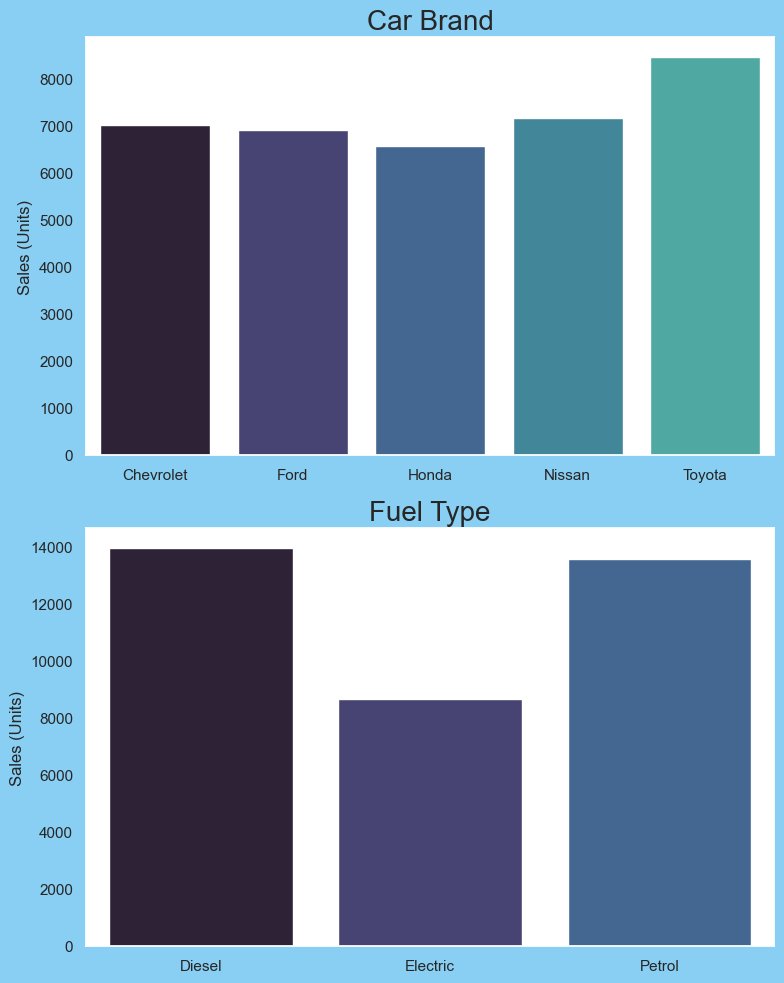

In [445]:
fig_object, axes_object = plt.subplots(len(data_object.columns.to_list()),1,figsize=(8, 10))

for i, axes in enumerate(data_object.columns.to_list()):
    group = Df.groupby([axes]).agg({'Sales (Units)':'sum'})
    sns.barplot(data=group, x=group.index, y='Sales (Units)', ax=axes_object[i])
    axes_object[i].set_title(axes, fontsize=20)
    axes_object[i].set_xlabel('')

plt.tight_layout()
plt.show()

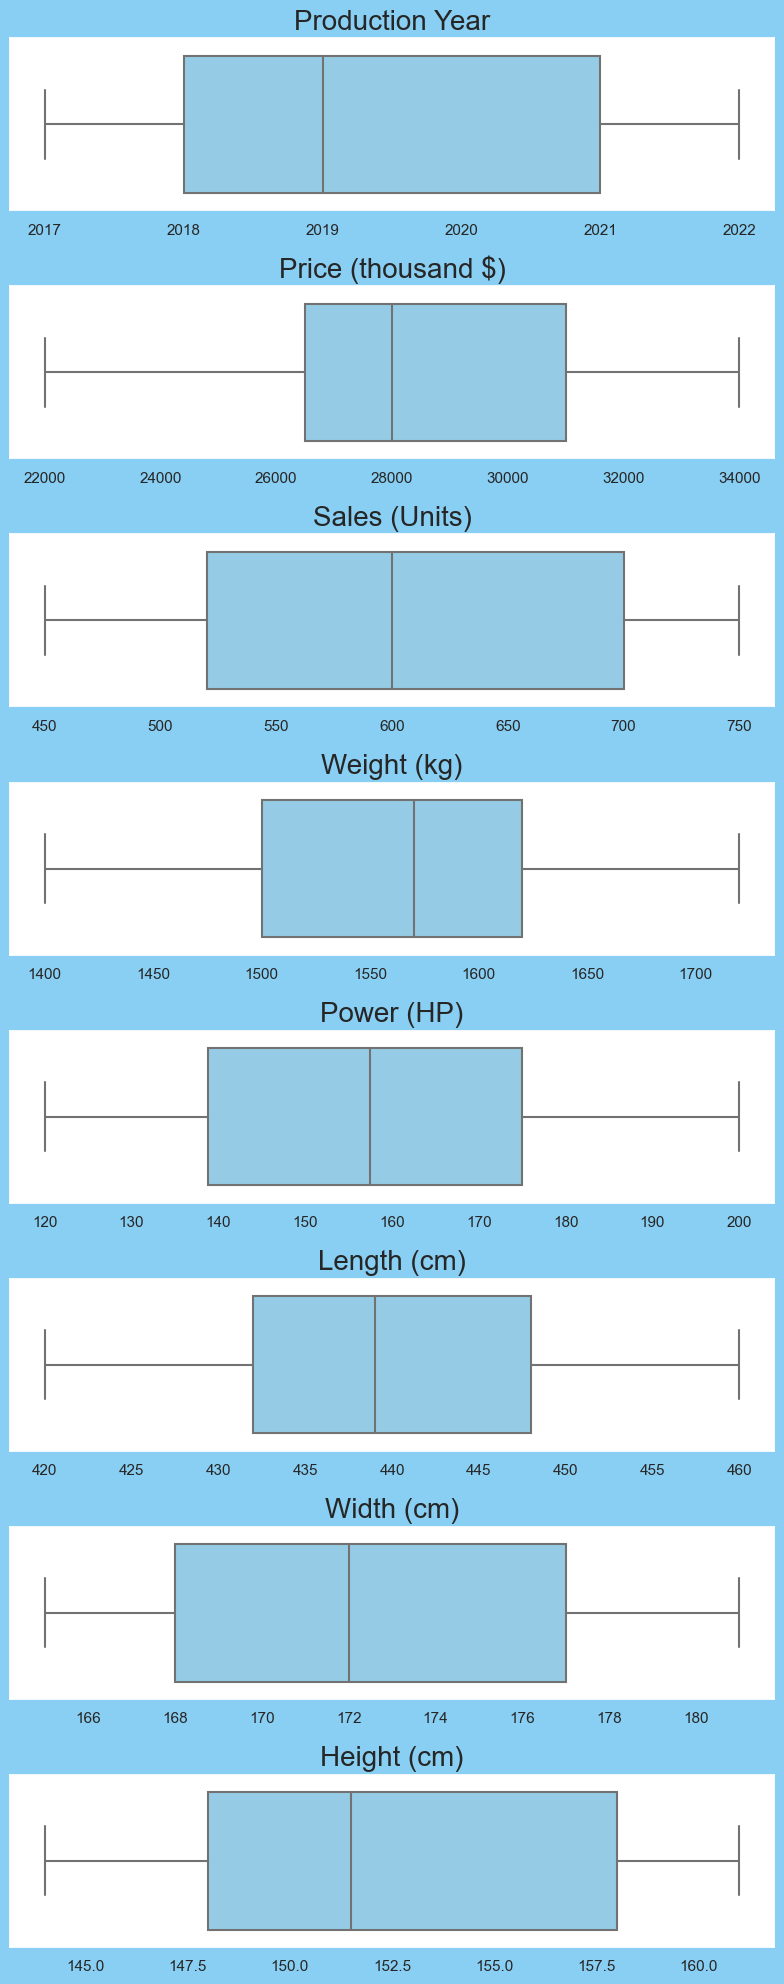

In [446]:
fig_num, axes_num = plt.subplots(
    nrows=len(data_num.columns.to_list()),
    ncols= 1,
    figsize=(8,20))

for j, ax in enumerate(data_num.columns.to_list()):
    sns.boxplot(data=Df, x=ax, ax=axes_num[j], color='#89CFF3')
    axes_num[j].set_title(ax,fontsize=20)
    axes_num[j].set_xlabel('')
    
plt.tight_layout()
plt.show()

### Preprocessing Dataset

In [447]:
DF = df.copy()

x = DF.drop(columns=['Sales (Units)'])
y = DF['Sales (Units)']

x_encod_object = x.select_dtypes('object').columns.to_list()
encoding = LabelEncoder()
for encod in x[x_encod_object]:
    x[encod] = encoding.fit_transform(x[encod])

scale = MinMaxScaler()
x = scale.fit_transform(x)

### LinearRegression

In [448]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=15)

regresi = LinearRegression()
regresi.fit(x_train,y_train)

pred1 = regresi.predict(x_test)
print(pred1)
print(f'\nKoefisien: {regresi.coef_}')
print(f'\nIntercept: {regresi.intercept_}')

[589.2691111  519.66427433 619.7896463  679.85892983 495.41383918
 788.29943621 538.98410658 654.96843063 505.32896939 552.38748743
 502.92913173 525.1508433 ]

Koefisien: [  25.60707118   82.57566886  -43.22530004  249.84831998   68.86315531
   53.43415259   24.79321927  -22.35790462 -150.34284559]

Intercept: 451.49159952802154


In [449]:
mae_1 = f'MAE: {mean_absolute_error(y_test,pred1)}'
msr_1 = f'MSR: {mean_squared_error(y_test, pred1)}'
r2_1 = f'R^2: {r2_score(y_test, pred1)}'

for a in [mae_1,msr_1,r2_1]:
    print(a)

MAE: 20.29166250929117
MSR: 733.8689221758049
R^2: 0.8869400612032567


### RandomForestRegressor

In [450]:
randomforest = RandomForestRegressor(max_depth=10,criterion='absolute_error')
randomforest.fit(x_train,y_train)

pred2 = randomforest.predict(x_test)
pred2

array([618.4, 525.2, 591. , 687.8, 480.6, 745.5, 528.7, 659. , 523.9,
       517.5, 491.6, 548.8])

In [451]:
mae_2 = f'MAE: {mean_absolute_error(y_test,pred2)}'
msr_2 = f'MSR: {mean_squared_error(y_test, pred2)}'
r2_2 = f'R^2: {r2_score(y_test, pred2)}'

for b in [mae_2,msr_2,r2_2]:
    print(b)

MAE: 14.583333333333334
MSR: 431.1833333333332
R^2: 0.933571841232481


### KNeighborsRegressor

In [452]:
neighbor = KNeighborsRegressor()
neighbor.fit(x_train,y_train)

pred3 = neighbor.predict(x_test)
pred3

array([648., 530., 586., 660., 510., 742., 528., 656., 526., 516., 540.,
       526.])

In [453]:
mae_3 = f'MAE: {mean_absolute_error(y_test,pred3)}'
msr_3 = f'MSR: {mean_squared_error(y_test, pred3)}'
r2_3 = f'R^2: {r2_score(y_test, pred3)}'

for c in [mae_3,msr_3,r2_3]:
    print(c)

MAE: 24.166666666666668
MSR: 954.3333333333334
R^2: 0.8529752861880817


### GradientBoostingRegressor

In [454]:
gradient = GradientBoostingRegressor(loss='absolute_error')
gradient.fit(x_train,y_train)

pred4 = gradient.predict(x_test)
pred4

array([602.58308129, 519.66060265, 607.80352059, 674.52516687,
       481.04690146, 748.80461567, 519.97675615, 617.37853288,
       518.96904318, 507.78904148, 488.55533641, 546.15179277])

In [455]:
mae_4 = f'MAE: {mean_absolute_error(y_test,pred4)}'
msr_4 = f'MSR: {mean_squared_error(y_test, pred4)}'
r2_4 = f'R^2: {r2_score(y_test, pred4)}'

for d in [mae_4,msr_4,r2_4]:
    print(d)

MAE: 5.3137484320555375
MSR: 61.82757840477893
R^2: 0.9904748354656165
